# 1.3 Barabási–Albert Scale-Free Network (BA Model)

In this notebook, we use the Barabási–Albert (BA) scale-free model.

**This is the most important model** for understanding real-world networks such as:

- Internet topology  
- Social networks  
- Citation networks  
- Blockchain networks (e.g., Ethereum transaction graph)

We will:

1. Understand preferential attachment.
2. Generate a BA graph using NetworkX.
3. Compute structural statistics.
4. Visualize degree distribution on log-log scale.
5. Compare key structural features to ER and WS models.
6. Prepare for comparison with the real Ethereum network.
   
## 1. Import libraries


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True


## 2. What is a Barabási–Albert (BA) scale-free network?

The BA model describes networks where **a few nodes (“hubs”) attract most of the connections**.
This generates a **power-law degree distribution**:

$$
P(k) \sim k^{-3}
$$

Key idea:

### ✔ Preferential Attachment
New nodes prefer to connect to **already highly connected nodes**.
This is also called the **"rich get richer"** mechanism.

---

### BA Model Parameters

- `n`: number of nodes  
- `m`: number of edges added for each new node  

Construction:

1. Start with a small fully connected network.
2. Add one new node at a time.
3. Connect it to `m` existing nodes.
4. Probability of connecting to node `i` is proportional to its degree.

---

### Why BA matters?

Because **many real-world networks are scale-free**, including:

- Web graphs  
- Social networks  
- Citation networks  
- Cryptocurrency transaction networks (Ethereum!)

Ethereum has large hubs:

- Exchanges  
- Staking pools  
- MEV bots  
- Smart contracts  

This makes Ethereum **much closer to BA than ER or WS**.


## 3. Choose BA parameters
Ethereum is large and sparse, for this research I will use a smaller graph.

In [2]:
n = 5000
m = 3   # each new node attaches to 3 existing nodes

print(f"BA parameters: n={n}, m={m}")


BA parameters: n=5000, m=3


##  4. Generate BA graph

In [3]:
G_ba = nx.barabasi_albert_graph(n=n, m=m, seed=42)

print("=== BA Graph Generated ===")
print("Nodes:", G_ba.number_of_nodes())
print("Edges:", G_ba.number_of_edges())


=== BA Graph Generated ===
Nodes: 5000
Edges: 14991


## 5. Basic statistics

In [4]:
num_nodes = G_ba.number_of_nodes()
num_edges = G_ba.number_of_edges()
avg_degree = 2 * num_edges / num_nodes

components = nx.number_connected_components(G_ba)

print("=== Basic BA Graph Statistics ===")
print("Nodes:", num_nodes)
print("Edges:", num_edges)
print("Average degree:", avg_degree)
print("Connected components:", components)


=== Basic BA Graph Statistics ===
Nodes: 5000
Edges: 14991
Average degree: 5.9964
Connected components: 1


BA graphs are typically **fully connected** (1 connected component).
This is different from ER graphs at low p.

## 6. Degree distribution (most important)

In [5]:
degrees = np.array([deg for _, deg in G_ba.degree()])
print("Min degree:", degrees.min())
print("Max degree:", degrees.max())


Min degree: 3
Max degree: 261


well, that's f* high.

####  Linear-scale histogram

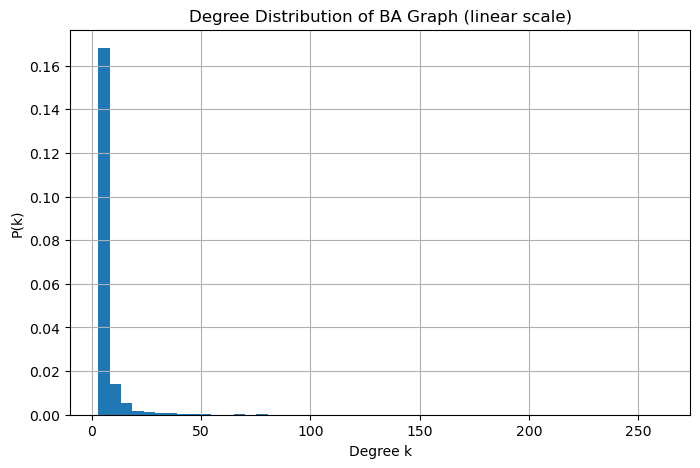

In [6]:
plt.hist(degrees, bins=50, density=True)
plt.title("Degree Distribution of BA Graph (linear scale)")
plt.xlabel("Degree k")
plt.ylabel("P(k)")
plt.show()


#### Log-log plot — power law will appear here 🔥

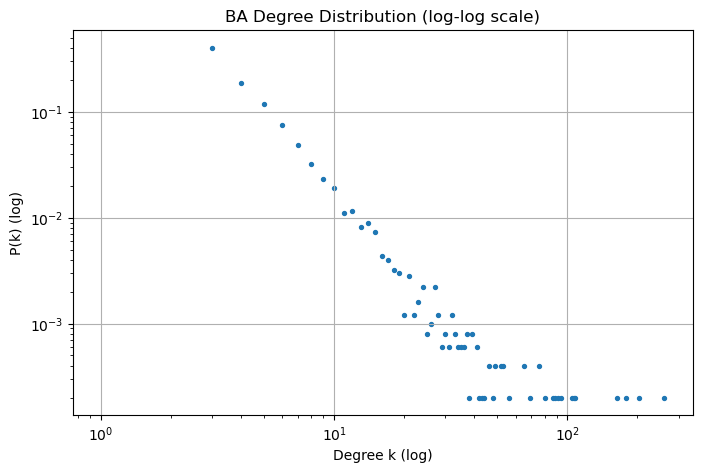

In [7]:
degree_counts = np.bincount(degrees)
k = np.arange(len(degree_counts))
p_k = degree_counts / degree_counts.sum()

plt.scatter(k[1:], p_k[1:], s=8)
plt.xscale("log")
plt.yscale("log")
plt.title("BA Degree Distribution (log-log scale)")
plt.xlabel("Degree k (log)")
plt.ylabel("P(k) (log)")
plt.show()


### Interpretation

This plot should approximate a straight line on log-log axes,
indicating:

$$  
P(k) \sim k^{-\gamma}
$$

This **power-law** distribution is the signature of **scale-free networks**.

Ethereum's degree distribution will look extremely similar.


## 7. Structural properties (clustering & path)

In [8]:
clustering_ba = nx.average_clustering(G_ba)
avg_path_ba = nx.average_shortest_path_length(G_ba)

print("Average clustering coefficient:", clustering_ba)
print("Average shortest path length:", avg_path_ba)


Average clustering coefficient: 0.009456125955734133
Average shortest path length: 4.022347029405881


BA networks have:

- **Low clustering** (higher than ER, lower than WS)
- **Short path length** (small-world property)

This makes BA a realistic model for:
- communication networks  
- trading networks  
- blockchain transaction networks  


# 8. Compare ER vs WS vs BA

| Property | ER | WS | BA |
|----------|----|----|----|
| Degree distribution | Narrow (Poisson) | Narrow | **Heavy-tailed (power-law)** |
| Hubs | No | No | **Yes** |
| Clustering | Low | **High** | Low–medium |
| Path length | Short | Short | Short |
| Mechanism | Random | Lattice + shortcuts | **Preferential attachment** |
| Realistic for Ethereum? | ❌ | ❌ | **✔✔✔** |

Ethereum's transaction network contains:

- Major exchanges (huge hubs)
- MEV bots (high-degree)
- Smart contracts with thousands of interactions

→ This matches the **BA power-law structure**.
